In [4]:
import os

# Set the environment variable
os.environ['SCIPY_USE_PROPACK'] = '1'

import numpy as np
import matplotlib.pyplot as plt
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/home/bpauldub/ShapleyFolkman/')
sys.path.insert(1, '/home/bpauldub/ShapleyFolkman/code/')



import scipy as sp
import os

import matplotlib.ticker as ticker

In [8]:
N = 20
n_range = [50, 100, 150, 200, 400, 600, 800, 1000]
nb_experiments = 5
K = 10000
rho_factor = 2
run_exact_carath = True
filename=f"results/runtimes_nb_experiments_{nb_experiments}_N_{N}_nrange_{len(n_range)}_K_{K}_rho_{rho_factor}.npy"
runtimes = np.load(filename)
runtimes_avg = np.mean(runtimes, axis=2)
runtimes_std = np.std(runtimes, axis=2)

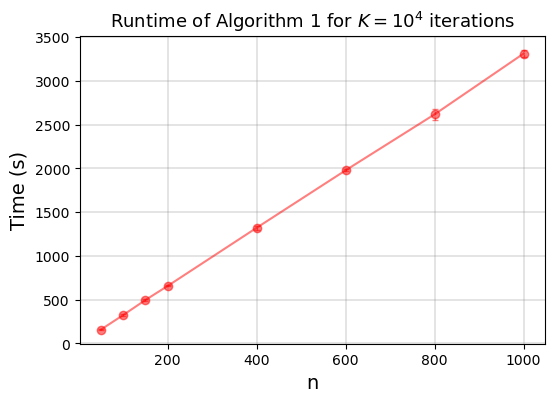

In [69]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,4))
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linewidth=0.3)
ax1.xaxis.grid(color='gray', linewidth=0.3)
err = ax1.errorbar(n_range, runtimes_avg[0, :], runtimes_std[0, :], marker='o', color="red",
                    capsize=2,          # Width of the caps
                    elinewidth=1,       # Line width of error bars
                    capthick=1,         # Thickness of the caps
                    alpha=0.5           # Transparency of the error bars
                    )
ax1.set_title(r"Runtime of Algorithm 1 for $K=10^4$ iterations", fontsize=13)
#ax1.loglog(K_range,  1500/np.sqrt(np.array(K_range) + 1), color="red", label=r"$\frac{C}{\sqrt{K}}$")
ax1.set_xlabel("n", fontsize=14)
ax1.set_ylabel("Time (s)", fontsize=14)
#ax1.set_xscale("log")
#ax1.set_yscale("log")
for bar in err[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))
#fig.legend(bbox_to_anchor=(0.9, 0.85),
#               borderaxespad=0.1, fontsize=13)
fig.savefig("figures/runtime_alg_1.pdf", format="pdf")

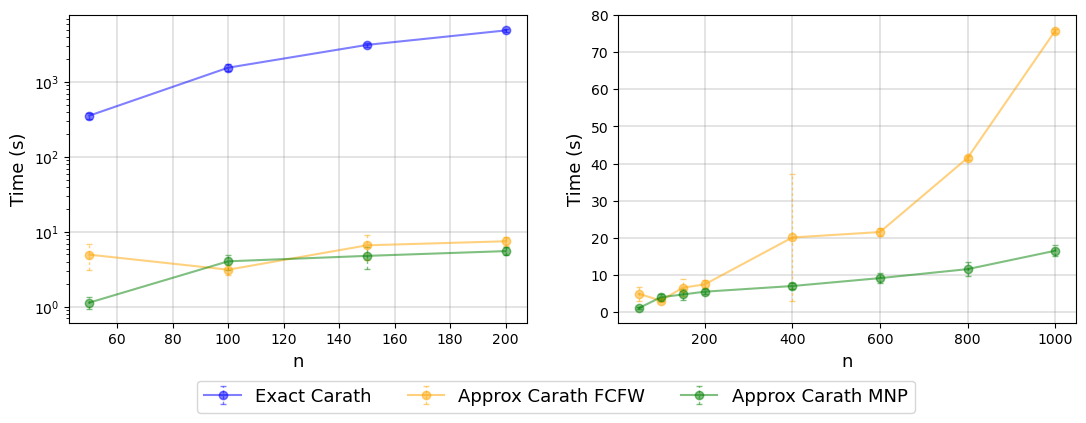

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linewidth=0.3)
ax1.xaxis.grid(color='gray', linewidth=0.3)
err1 = ax1.errorbar(n_range[:4], runtimes_avg[1, :4], runtimes_std[1, :4], marker='o', color="blue", label="Exact Carath",
            capsize=2,          # Width of the caps
            elinewidth=1,       # Line width of error bars
            capthick=1,         # Thickness of the caps
            alpha=0.5           # Transparency of the error bars
            )
err2 = ax1.errorbar(n_range[:4], runtimes_avg[2, :4], runtimes_std[2, :4], marker='o', color="orange", label="Approx Carath FCFW",
            capsize=2,          # Width of the caps
            elinewidth=1,       # Line width of error bars
            capthick=1,         # Thickness of the caps
            alpha=0.5           # Transparency of the error bars
            )
err3 = ax1.errorbar(n_range[:4], runtimes_avg[3, :4], runtimes_std[3, :4], marker='o', color="green", label="Approx Carath MNP",
            capsize=2,          # Width of the caps
            elinewidth=1,       # Line width of error bars
            capthick=1,         # Thickness of the caps
            alpha=0.5           # Transparency of the error bars
            )

for bar in err1[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))

for bar in err2[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))

for bar in err3[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))

#ax1.loglog(K_range,  1500/np.sqrt(np.array(K_range) + 1), color="red", label=r"$\frac{C}{\sqrt{K}}$")
ax1.set_xlabel("n", fontsize=13)
ax1.set_ylabel("Time (s)", fontsize=13)
ax1.set_yscale("log")
#ax1.legend(bbox_to_anchor=(0.9, 0.85),
 #              borderaxespad=0.1, fontsize=13)

ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linewidth=0.3)
ax2.xaxis.grid(color='gray', linewidth=0.3)
err2 = ax2.errorbar(n_range[:], runtimes_avg[2, :], runtimes_std[2, :], marker='o', color="orange",
            capsize=2,          # Width of the caps
            elinewidth=1,       # Line width of error bars
            capthick=1,         # Thickness of the caps
            alpha=0.5           # Transparency of the error bars
            )
err3 = ax2.errorbar(n_range[:], runtimes_avg[3, :], runtimes_std[3, :], marker='o', color="green",
            capsize=2,          # Width of the caps
            elinewidth=1,       # Line width of error bars
            capthick=1,         # Thickness of the caps
            alpha=0.5           # Transparency of the error bars
            )

for bar in err2[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))

for bar in err3[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))

#ax1.loglog(K_range,  1500/np.sqrt(np.array(K_range) + 1), color="red", label=r"$\frac{C}{\sqrt{K}}$")
ax2.set_xlabel("n", fontsize=13)
ax2.set_ylabel("Time (s)", fontsize=13)
#ax2.legend(bbox_to_anchor=(0.9, 0.85),
 #              borderaxespad=0.1, fontsize=13)

lgd = fig.legend(loc="lower center",
               borderaxespad=0.1, fontsize=13, ncol=3, bbox_to_anchor=(0.5, -0.12))
fig.savefig("figures/runtime_alg_2.pdf", format="pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig('samplefigure', bbox_extra_artists=(lgd,), bbox_inches='tight')

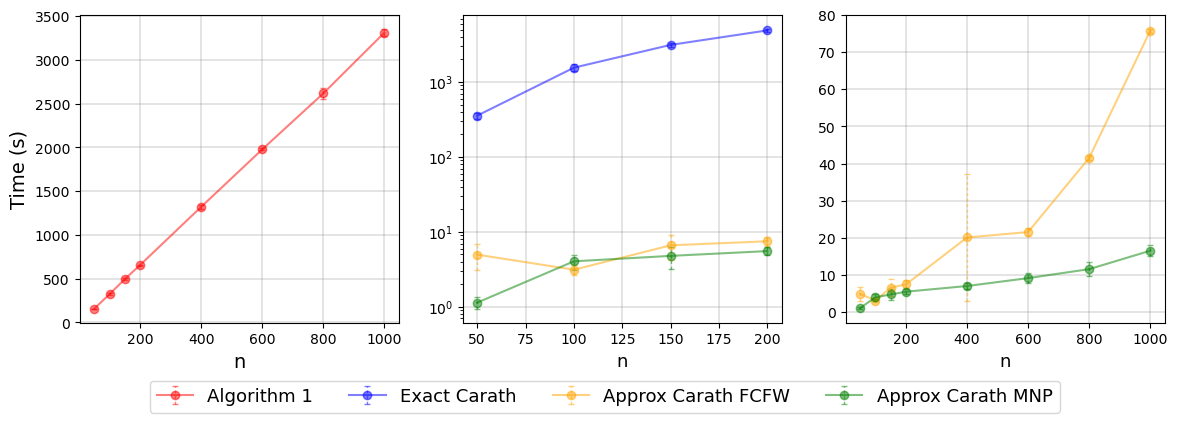

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))


ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linewidth=0.3)
ax1.xaxis.grid(color='gray', linewidth=0.3)
err = ax1.errorbar(n_range, runtimes_avg[0, :], runtimes_std[0, :], marker='o', color="red", label="Algorithm 1",
                    capsize=2,          # Width of the caps
                    elinewidth=1,       # Line width of error bars
                    capthick=1,         # Thickness of the caps
                    alpha=0.5           # Transparency of the error bars
                    )
#ax1.set_title(r"Runtime of Algorithm 1 for $K=10^4$ iterations", fontsize=13)
#ax1.loglog(K_range,  1500/np.sqrt(np.array(K_range) + 1), color="red", label=r"$\frac{C}{\sqrt{K}}$")
ax1.set_xlabel("n", fontsize=14)
ax1.set_ylabel("Time (s)", fontsize=14)
#ax1.set_xscale("log")
#ax1.set_yscale("log")
for bar in err[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))



ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linewidth=0.3)
ax2.xaxis.grid(color='gray', linewidth=0.3)
err1 = ax2.errorbar(n_range[:4], runtimes_avg[1, :4], runtimes_std[1, :4], marker='o', color="blue", label="Exact Carath",
            capsize=2,          # Width of the caps
            elinewidth=1,       # Line width of error bars
            capthick=1,         # Thickness of the caps
            alpha=0.5           # Transparency of the error bars
            )
err2 = ax2.errorbar(n_range[:4], runtimes_avg[2, :4], runtimes_std[2, :4], marker='o', color="orange", label="Approx Carath FCFW",
            capsize=2,          # Width of the caps
            elinewidth=1,       # Line width of error bars
            capthick=1,         # Thickness of the caps
            alpha=0.5           # Transparency of the error bars
            )
err3 = ax2.errorbar(n_range[:4], runtimes_avg[3, :4], runtimes_std[3, :4], marker='o', color="green", label="Approx Carath MNP",
            capsize=2,          # Width of the caps
            elinewidth=1,       # Line width of error bars
            capthick=1,         # Thickness of the caps
            alpha=0.5           # Transparency of the error bars
            )

for bar in err1[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))

for bar in err2[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))

for bar in err3[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))

#ax1.loglog(K_range,  1500/np.sqrt(np.array(K_range) + 1), color="red", label=r"$\frac{C}{\sqrt{K}}$")
ax2.set_xlabel("n", fontsize=13)
#ax2.set_ylabel("Time (s)", fontsize=13)
ax2.set_yscale("log")
#ax1.legend(bbox_to_anchor=(0.9, 0.85),
 #              borderaxespad=0.1, fontsize=13)

ax3.set_axisbelow(True)
ax3.yaxis.grid(color='gray', linewidth=0.3)
ax3.xaxis.grid(color='gray', linewidth=0.3)
err2 = ax3.errorbar(n_range[:], runtimes_avg[2, :], runtimes_std[2, :], marker='o', color="orange",
            capsize=2,          # Width of the caps
            elinewidth=1,       # Line width of error bars
            capthick=1,         # Thickness of the caps
            alpha=0.5           # Transparency of the error bars
            )
err3 = ax3.errorbar(n_range[:], runtimes_avg[3, :], runtimes_std[3, :], marker='o', color="green",
            capsize=2,          # Width of the caps
            elinewidth=1,       # Line width of error bars
            capthick=1,         # Thickness of the caps
            alpha=0.5           # Transparency of the error bars
            )

for bar in err2[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))

for bar in err3[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))

#ax1.loglog(K_range,  1500/np.sqrt(np.array(K_range) + 1), color="red", label=r"$\frac{C}{\sqrt{K}}$")
ax3.set_xlabel("n", fontsize=13)
#ax3.set_ylabel("Time (s)", fontsize=13)
#ax2.legend(bbox_to_anchor=(0.9, 0.85),
 #              borderaxespad=0.1, fontsize=13)

lgd = fig.legend(loc="lower center",
               borderaxespad=0.1, fontsize=13, ncol=4, bbox_to_anchor=(0.5, -0.12))
fig.savefig("figures/runtime_all.pdf", format="pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')